### Sberbank bank - predicting sales
#### Data Cleansing

#### Plan
1. DC
    2. EDA
    3. Outliers
    4. Unnecessary Data
    5. Inconsistent Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.mlab as mlab

import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read the data

df = pd.read_csv('train.csv')

# shape and data types of the data

print(df.shape)
print(df.dtypes)

# select numeric columns

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object
['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_

In [15]:
cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))


Error in callback <function flush_figures at 0x112d1a790> (for post_execute):


KeyboardInterrupt: 

In [16]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
timestamp - 0.0%
full_sq - 0.0%
life_sq - 21.0%
floor - 1.0%
max_floor - 31.0%
material - 31.0%
build_year - 45.0%
num_room - 31.0%
kitch_sq - 31.0%
state - 44.0%
product_type - 0.0%
sub_area - 0.0%
area_m - 0.0%
raion_popul - 0.0%
green_zone_part - 0.0%
indust_part - 0.0%
children_preschool - 0.0%
preschool_quota - 22.0%
preschool_education_centers_raion - 0.0%
children_school - 0.0%
school_quota - 22.0%
school_education_centers_raion - 0.0%
school_education_centers_top_20_raion - 0.0%
hospital_beds_raion - 47.0%
healthcare_centers_raion - 0.0%
university_top_20_raion - 0.0%
sport_objects_raion - 0.0%
additional_education_raion - 0.0%
culture_objects_top_25 - 0.0%
culture_objects_top_25_raion - 0.0%
shopping_centers_raion - 0.0%
office_raion - 0.0%
thermal_power_plant_raion - 0.0%
incineration_raion - 0.0%
oil_chemistry_raion - 0.0%
radiation_raion - 0.0%
railroad_terminal_raion - 0.0%
big_market_raion - 0.0%
nuclear_reactor_raion - 0.0%
detention_facility_raion - 0.0%
full_

## Technique #3: Missing Data Histogram

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

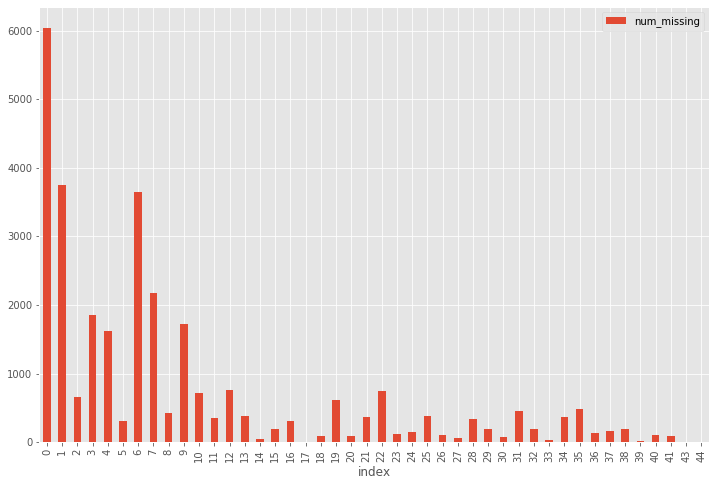

In [18]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [21]:
# drop rows with a lot of missing values

ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

In [22]:
# hospital_beds_raion has a lot of missing.
# If we want to drop.
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

## Imputation of missing values

In [23]:
# replace missing values with the median
med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)

30.0


In [29]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: floor
imputing missing values for: max_floor
imputing missing values for: material
imputing missing values for: build_year
imputing missing values for: num_room
imputing missing values for: kitch_sq
imputing missing values for: state
imputing missing values for: preschool_quota
imputing missing values for: school_quota
imputing missing values for: hospital_beds_raion
imputing missing values for: raion_build_count_with_material_info
imputing missing values for: build_count_block
imputing missing values for: build_count_wood
imputing missing values for: build_count_frame
imputing missing values for: build_count_brick
imputing missing values for: build_count_monolith
imputing missing values for: build_count_panel
imputing missing values for: build_count_foam
imputing missing values for: build_count_slag
imputing missing values for: build_count_mix
imputing missing values for: raion_build_count_with_builddate_info
imputing missing values for: build_count_before

In [31]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

In [35]:
# categorical
df['sub_area'] = df['sub_area'].fillna('_MISSING_')
# numeric
df['life_sq'] = df['life_sq'].fillna(-999)

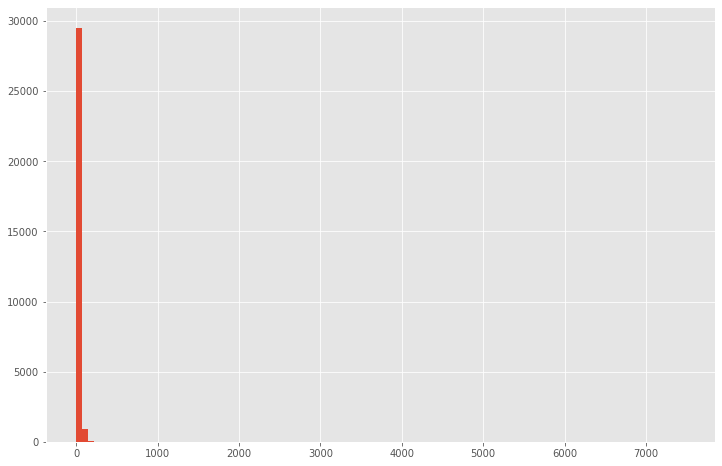

In [36]:
df['life_sq'].hist(bins=100)

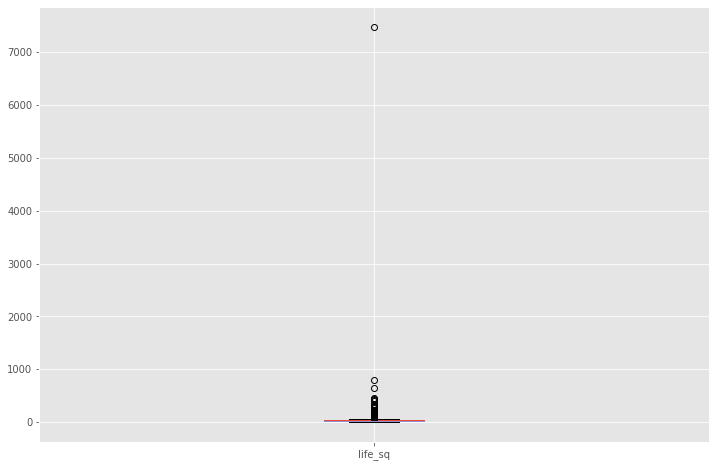

In [37]:
df.boxplot(column=['life_sq'])

In [38]:
df['life_sq'].describe()

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

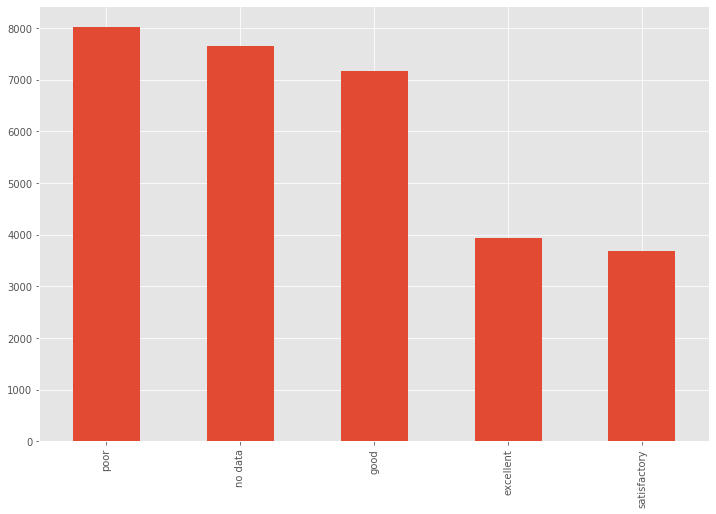

In [39]:
# bar chart -  distribution of a categorical variable
df['ecology'].value_counts().plot.bar()

### Handling with outliers

#### 1. Unnecessary type #1: Uninformative / Repetitive

In [44]:
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.02858%
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.27187%
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.16780%
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

build_count_foam: 95.35624%
0.0     29056
1.0       969
11.0      262
2.0       184
Name: build_count_foam, dtype: int64

big_road1_1line: 97.43691%
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06934%
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.25641%
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.51101%
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.52689%
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosq

In [45]:
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(30471, 345)
(30461, 344)


In [46]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2012-10-22  61       30.0     18.0   1979.0      2.0       8248500      2
2014-12-17  62       30.0     9.0    1979.0      2.0       6552000      2
2014-01-22  46       28.0     1.0    1968.0      2.0       3000000      2
2013-04-03  42       30.0     2.0    1979.0      2.0       3444000      2
2013-09-23  85       30.0     14.0   1979.0      3.0       7725974      2
2012-08-27  59       30.0     6.0    1979.0      2.0       4506800      2
2014-04-15  134      134.0    1.0    0.0         3.0       5798496      2
2013-05-22  68       30.0     2.0    1979.0      2.0       5406690      2
2013-12-05  40       30.0     5.0    1979.0      1.0       4414080      2
2012-09-05  43       30.0     21.0   1979.0      2.0       6229540      2
2015-03-30  41       41.0     11.0   2016.0      1.0       4114580      2
2013-12-18  39       30.0     6.0    1979.0      1.0       3700946      2
2013-06-24  40       30.0     12.0   1979.0

In [47]:
# drop duplicates based on an subset of variables.

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(30471, 345)
(30455, 345)


### Inconsistent data
##### Inconsistent type #1: Capitalization

In [51]:
df['sub_area'].value_counts(dropna=False)


Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Mihajlovo-Jarcevskoe       1
Poselenie Klenovskoe                 1
Name: sub_area, Length: 146, dtype: int64

In [52]:
# make everything lower case.
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie kievskij                   2
poselenie shhapovskoe                2
poselenie mihajlovo-jarcevskoe       1
poselenie klenovskoe                 1
Name: sub_area_lower, Length: 146, dtype: int64

In [53]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: year, dtype: int64

12    3400
4     3191
3     2972
11    2970
10    2736
6     2570
5     2496
9     2346
2     2275
7     1875
8     1831
1     1809
Name: month, dtype: int64
